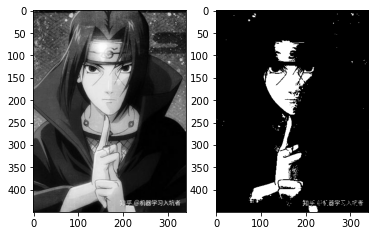

In [4]:
import imageio 
import numpy as np
import matplotlib.pyplot as plt
#idaqi = imageio.imread("idaqi_jieyin.jpg")
idaqi = imageio.imread("C:/Users/asus/Desktop/w.jpg")
def rgb2gray(rgb):#将RGB图像转换为灰度值图像，公式：Gray=R*0.3+G*0.59+B*0.11
    """
    rgb 2 gray
    Args:
        rgb image
    Returns:
        gray image
    """
    gray = rgb[:, :, 0] * 0.299 + rgb[:, :, 1] * 0.587 + rgb[:, :, 2] * 0.114
    return gray
def thre_bin(image, threshold=200):  #二值化函数，将包含不同像素值的图像根据阈值threshold，转换为只有2种像素值的二值图
    #将像素值严格限制为0和1（也可以是0和255）
    """
    binary image
    """
    threshold_image = np.zeros(shape=(image.shape[0], image.shape[1]), dtype=np.uint8)#unit8取值范围是0—255
    gray = rgb2gray(image)
    # loop for every pixel
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            if gray[i][j] > threshold:
                threshold_image[i][j] = 255
            else:
                threshold_image[i][j] = 0
    return threshold_image, gray

bin_image, gray = thre_bin(idaqi)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(gray/255, cmap="gray")#cmap="gray"显示为灰度图
plt.subplot(1, 2, 2)
plt.imshow(bin_image/255, cmap="gray")
plt.show()

In [5]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
 
def rgb2gray(rgb):
    """
    rgb 2 gray
    Args:
        rgb image
    Returns:
        gray image
    """
    gray = rgb[:, :, 0] * 0.299 + rgb[:, :, 1] * 0.587 + rgb[:, :, 2] * 0.114
    return gray
 
# 1:read image 
image = np.array(imageio.imread("C:/Users/asus/Desktop/w.jpg")[:, :, 0:3])
# 2:convert rgb to gray image
image = rgb2gray(image)
# 3: dark area become bright, bright area become dark
invert_image = 255 - image

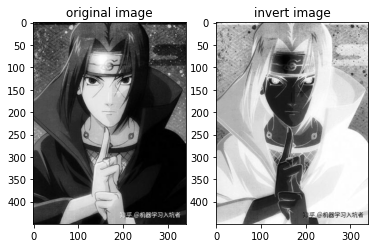

In [6]:

# plot 
plot_image = [image, invert_image]
plot_title = ["original image", "invert image"]
plt.figure()
for i in range(1, len(plot_image)+1):
    plt.subplot(1, len(plot_image), i)
    plt.imshow(plot_image[i-1], cmap="gray")
    plt.title(plot_title[i-1])
plt.show()

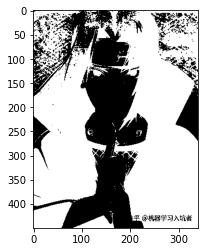

In [8]:
def thre_bin(gray_image, threshold=170):  
    """
    binary image
    Args:
        gray_image:image with gray scale
        threshold:the split standard
    Returns:
        bin image
    """
    threshold_image = np.zeros(shape=(image.shape[0], image.shape[1]), dtype=np.uint8)
    # loop for every pixel
    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            if gray_image[i][j] > threshold:
                threshold_image[i][j] = 1
            else:
                threshold_image[i][j] = 0
    return threshold_image
bin_image = thre_bin(invert_image)
plt.imshow(bin_image, cmap="gray") 

In [2]:
#import imageio 
#idaqi = imageio.imread("C:/Users/asus/Desktop/z.jfif")

In [3]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
 
def rgb2gray(rgb):
    """
    rgb 2 gray
    Args:
        rgb image
    Returns:
        gray image
    """
    gray = rgb[:, :, 0] * 0.299 + rgb[:, :, 1] * 0.587 + rgb[:, :, 2] * 0.114
    return gray
 
# 1:read image 
image = np.array(imageio.imread("C:/Users/asus/Desktop/z.jfif")[:, :, 0:3])
# 2:convert rgb to gray image
image = rgb2gray(image)
# 3: dark area become bright, bright area become dark
invert_image = 255 - image

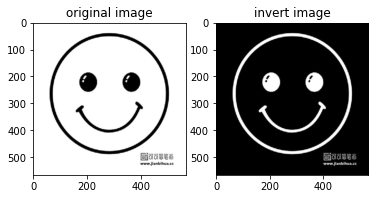

In [4]:
# plot 
plot_image = [image, invert_image]
plot_title = ["original image", "invert image"]
plt.figure()
for i in range(1, len(plot_image)+1):
    plt.subplot(1, len(plot_image), i)
    plt.imshow(plot_image[i-1], cmap="gray")
    plt.title(plot_title[i-1])
plt.show()

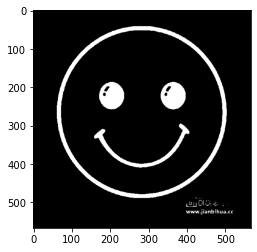

In [5]:
def thre_bin(gray_image, threshold=170):  
#二值化以后视觉效果是不会变的，仅仅是将像素值严格限制为0和1（也可以是0和255）
    """
    binary image
    Args:
        gray_image:image with gray scale
        threshold:the split standard
    Returns:
        bin image
    """
    threshold_image = np.zeros(shape=(image.shape[0], image.shape[1]), dtype=np.uint8)
    # loop for every pixel
    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            if gray_image[i][j] > threshold:
                threshold_image[i][j] = 1
            else:
                threshold_image[i][j] = 0
    return threshold_image
bin_image = thre_bin(invert_image)
plt.imshow(bin_image, cmap="gray")  

In [11]:
kernel = np.ones(shape=(5, 5))#产生5*5的1矩阵，腐蚀卷积核为5
def erode_bin_image(bin_image, kernel):#腐蚀图像
    """
    erode bin image
    Args:
        bin_image: image with 0,1 pixel value
    Returns:
        erode image
    """
    kernel_size = kernel.shape[0]
    bin_image = np.array(bin_image)
    if (kernel_size%2 == 0) or kernel_size<1:#判断卷积核尺寸是不是奇数并且正整数
        raise ValueError("kernel size must be odd and bigger than 1")
    if (bin_image.max() != 1) or (bin_image.min() != 0):#用来判断输入图像是不是灰度图像
        raise ValueError("input image's pixel value must be 0 or 1")
    d_image = np.zeros(shape=bin_image.shape)
    center_move = int((kernel_size-1)/2)#2
    for i in range(center_move, bin_image.shape[0]-kernel_size+1):
        for j in range(center_move, bin_image.shape[1]-kernel_size+1):
            d_image[i, j] = np.min(bin_image[i-center_move:i+center_move,
                                             j-center_move:j+center_move])
    return d_image

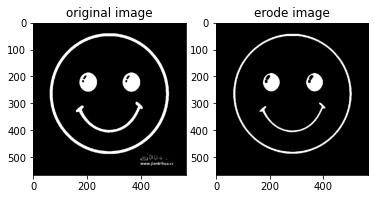

In [12]:
e_image = erode_bin_image(bin_image, kernel)
plot_image = [bin_image, e_image]
plot_title = ["original image", "erode image"]
plt.figure()
for i in range(1, len(plot_image)+1):
    plt.subplot(1, len(plot_image), i)
    plt.imshow(plot_image[i-1], cmap="gray")
    plt.title(plot_title[i-1])
plt.show()

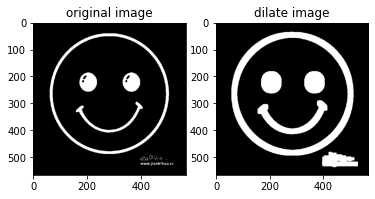

In [13]:
kernel = np.ones(shape=(13, 13))
def dilate_bin_image(bin_image, kernel):#膨胀
    """
    dilate bin image
    Args:
        bin_image: image with 0,1 pixel value
    Returns:
        dilate image
    """
    kernel_size = kernel.shape[0]
    bin_image = np.array(bin_image)
    if (kernel_size%2 == 0) or kernel_size<1:
        raise ValueError("kernel size must be odd and bigger than 1")
    if (bin_image.max() != 1) or (bin_image.min() != 0):
        raise ValueError("input image's pixel value must be 0 or 1")
    d_image = np.zeros(shape=bin_image.shape)
    center_move = int((kernel_size-1)/2)
    for i in range(center_move, bin_image.shape[0]-kernel_size+1):
        for j in range(center_move, bin_image.shape[1]-kernel_size+1):
            d_image[i, j] = np.max(bin_image[i-center_move:i+center_move,j-center_move:j+center_move])
    return d_image
d_image = dilate_bin_image(bin_image, kernel)
plot_image = [bin_image, d_image]
plot_title = ["original image", "dilate image"]
plt.figure()
for i in range(1, len(plot_image)+1):
    plt.subplot(1, len(plot_image), i)
    plt.imshow(plot_image[i-1], cmap="gray")
    plt.title(plot_title[i-1])
plt.show()